In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pwd

'/Users/katherinevoss-robinson/Documents/207_ML/datasci207_final_AHIK'

# Extraction and Merging

In [45]:
raw_df = pd.read_csv('../Fantasy-Premier-League/data/cleaned_merged_seasons.csv', dtype={'team_x': str})
ms_list = pd.read_csv('../Fantasy-Premier-League/data/master_team_list.csv')

In [46]:
merged_2018_19 = pd.read_csv('../Fantasy-Premier-League/data/2018-19/gws/merged_gw.csv', encoding='iso-8859-1')
merged_2018_19.head()

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW
0,Aaron_Cresswell_402,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,55,False,0,0,1
1,Aaron_Lennon_83,0,22,0,1,0,6,1,1,17,...,17.0,3,0,0,0,50,False,0,0,1
2,Aaron_Mooy_199,0,51,0,0,0,24,0,2,40,...,0.0,2,0,0,0,55,True,0,0,1
3,Aaron_Ramsey_14,0,11,0,0,0,7,0,0,7,...,9.0,1,0,0,0,75,True,0,0,1
4,Aaron_Wan-Bissaka_145,1,29,1,0,3,38,1,11,19,...,0.0,12,0,0,0,40,False,0,0,1


In [47]:
players = pd.read_csv('../Fantasy-Premier-League/data/2018-19/cleaned_players.csv')
players.head()

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
0,Petr,Cech,0,0,24,585,9,0.0,205.0,0.0,3,130,20.4,1,0,0,1.1,47
1,Bernd,Leno,0,0,106,2835,42,0.0,807.2,0.0,5,568,80.5,6,0,0,4.0,49
2,Laurent,Koscielny,3,0,62,1329,23,29.5,456.4,105.0,8,319,59.1,3,0,1,0.9,54
3,Héctor,Bellerín,0,5,60,1532,21,197.8,261.6,280.0,5,304,73.7,4,0,3,4.5,53
4,Nacho,Monreal,1,4,77,1860,24,196.6,413.2,224.0,7,392,83.4,5,0,5,1.3,54


In [48]:
merged_2018_19.columns

Index(['name', 'assists', 'attempted_passes', 'big_chances_created',
       'big_chances_missed', 'bonus', 'bps', 'clean_sheets',
       'clearances_blocks_interceptions', 'completed_passes', 'creativity',
       'dribbles', 'ea_index', 'element', 'errors_leading_to_goal',
       'errors_leading_to_goal_attempt', 'fixture', 'fouls', 'goals_conceded',
       'goals_scored', 'ict_index', 'id', 'influence', 'key_passes',
       'kickoff_time', 'kickoff_time_formatted', 'loaned_in', 'loaned_out',
       'minutes', 'offside', 'open_play_crosses', 'opponent_team', 'own_goals',
       'penalties_conceded', 'penalties_missed', 'penalties_saved',
       'recoveries', 'red_cards', 'round', 'saves', 'selected', 'tackled',
       'tackles', 'target_missed', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'winning_goals', 'yellow_cards', 'GW'],
      dtype='object')

In [49]:
df_19 = merged_2018_19[['name', 'assists', 'goals_scored', 'total_points', 'minutes',
               'clean_sheets', 'value', 'was_home', 'threat', 'yellow_cards', 'GW']].copy()
df_19['season_x'] = '2018-19'
df_19['team_x'] = np.nan
df_19['position'] = np.nan

df_19['name'] = df_19['name'].apply(lambda x: x[:x.rfind('_')].replace('_', ' '))
df_19.head()

,name,assists,goals_scored,total_points,minutes,clean_sheets,value,was_home,threat,yellow_cards,GW,season_x,team_x,position
0,Aaron Cresswell,0,0,0,0,0,55,False,0.0,0,1,2018-19,NaN,NaN
1,Aaron Lennon,0,0,3,90,1,50,False,17.0,0,1,2018-19,NaN,NaN
2,Aaron Mooy,0,0,2,90,0,55,True,0.0,0,1,2018-19,NaN,NaN
3,Aaron Ramsey,0,0,1,53,0,75,True,9.0,0,1,2018-19,NaN,NaN
4,Aaron Wan-Bissaka,1,0,12,90,1,40,False,0.0,0,1,2018-19,NaN,NaN


In [50]:
merged_2019_20 = pd.read_csv('../Fantasy-Premier-League/data/2019-20/gws/merged_gw.csv', encoding='iso-8859-1')
merged_2019_20.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Aaron_Cresswell_376,0,0,7,0,1.5,376,8,5,0,...,0.0,0.0,0,0,0,0,50,True,0,1
1,Aaron_Lennon_430,0,0,3,0,0.0,430,3,0,0,...,3.0,0.0,1,0,0,0,50,True,0,1
2,Aaron_Mooy_516,0,0,0,0,0.0,516,7,0,0,...,0.0,0.0,0,0,0,0,50,False,0,1
3,Aaron_Ramsdale_494,0,0,11,0,0.0,494,2,1,0,...,1.0,0.0,2,0,0,0,45,True,0,1
4,Aaron_Wan-Bissaka_122,0,2,34,1,16.1,122,9,0,0,...,4.0,2.0,8,0,0,0,55,True,0,1


In [51]:
df_20 = merged_2019_20[['name', 'assists', 'goals_scored', 'total_points', 'minutes',
               'clean_sheets', 'value', 'was_home', 'threat', 'yellow_cards', 'GW']].copy()
df_20['season_x'] = '2019-20'
df_20['team_x'] = np.nan
df_20['position'] = np.nan
df_20['name'] = df_20['name'].apply(lambda x: x[:x.rfind('_')].replace('_', ' '))
df_20.head()
df_20.columns

Index(['name', 'assists', 'goals_scored', 'total_points', 'minutes',
       'clean_sheets', 'value', 'was_home', 'threat', 'yellow_cards', 'GW',
       'season_x', 'team_x', 'position'],
      dtype='object')

In [52]:
df = raw_df[['name', 'assists', 'goals_scored', 'total_points', 'minutes',
       'clean_sheets', 'value', 'was_home', 'threat', 'yellow_cards', 'GW',
       'season_x', 'team_x', 'position']].copy()

In [53]:
df = pd.concat([df, df_19, df_20])
df.season_x.value_counts()

season_x
2022-23    26505
2021-22    25447
2020-21    24365
2019-20    22560
2018-19    21790
2017-18    11285
2016-17     8567
Name: count, dtype: int64

In [56]:
df.shape[0]

140519

In [65]:
df2 = df[['season_x','name']].groupby(['season_x']).count()

df2['pct_of_data'] = round(df2['name'] / df.shape[0] * 100,0)

In [66]:
df2

,name,pct_of_data
season_x,,
2016-17,8567,6.0
2017-18,11285,8.0
2018-19,21790,16.0
2019-20,22560,16.0
2020-21,24365,17.0
2021-22,25447,18.0
2022-23,26505,19.0


# Checking Distributions

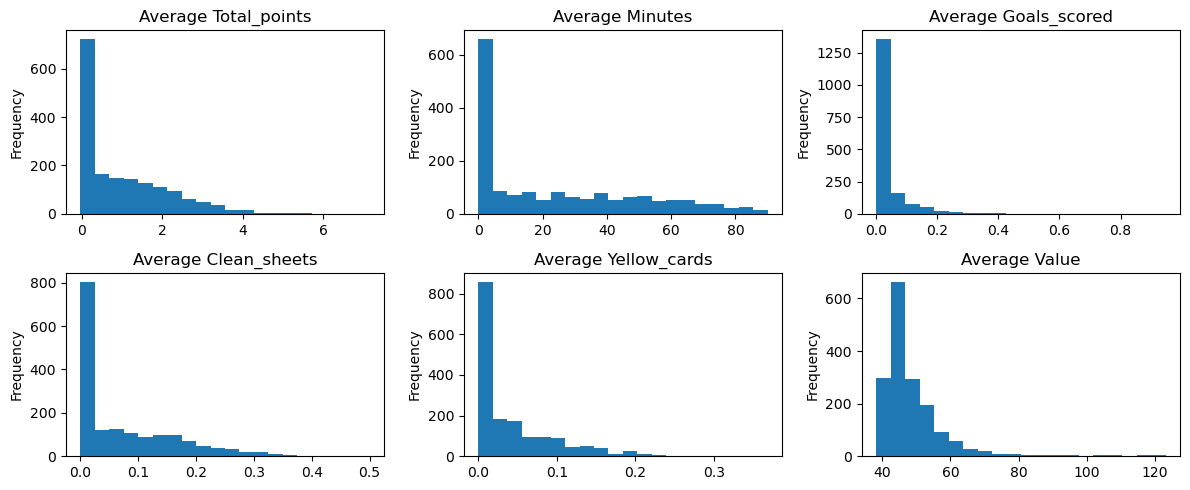

In [15]:


# Group by 'name' to analyze individual player performance
player_grouped = df.groupby('name')

# Define the performance metrics to analyze
metrics_to_analyze = ['total_points', 'minutes', 'goals_scored', 'clean_sheets', 'yellow_cards' , 'value']

# Calculate mean values for each metric
mean_values = player_grouped[metrics_to_analyze].mean()

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 5))

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, metric in enumerate(metrics_to_analyze):
    # Plot histograms on the appropriate subplot
    axes[i].hist(mean_values[metric], bins=20)
    axes[i].set_title(f'Average {metric.capitalize()}')
    # axes[i].set_xlabel(f'{metric}')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
if len(metrics_to_analyze) < len(axes):
    for j in range(len(metrics_to_analyze), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


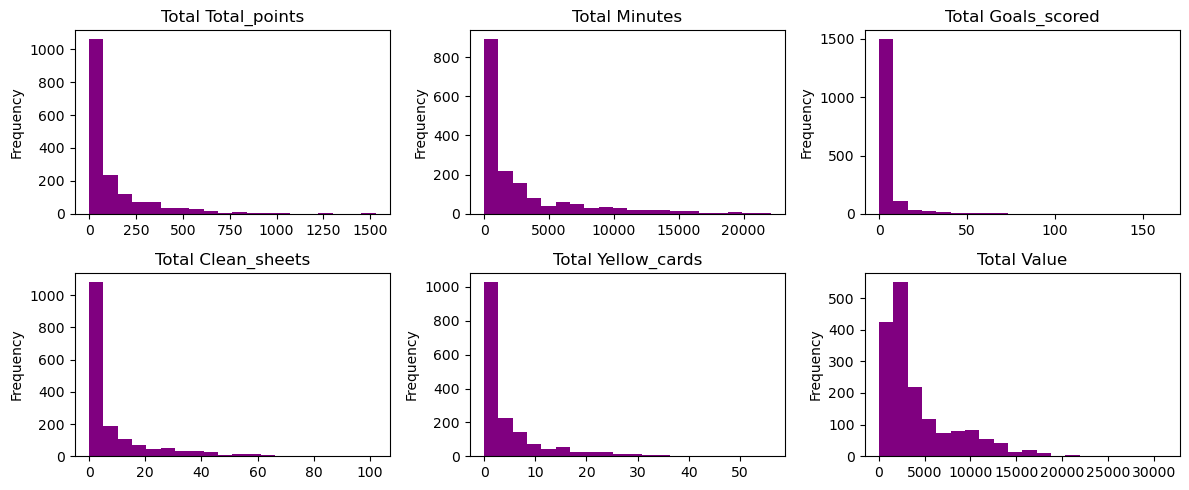

In [16]:



# Calculate mean values for each metric
mean_values = player_grouped[metrics_to_analyze].sum()

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 5))

# Flatten the axes for easy iteration
axes = axes.flatten()

for i, metric in enumerate(metrics_to_analyze):
    # Plot histograms on the appropriate subplot
    axes[i].hist(mean_values[metric], bins=20, color='purple')
    axes[i].set_title(f'Total {metric.capitalize()}')
    # axes[i].set_xlabel(f'{metric}')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
if len(metrics_to_analyze) < len(axes):
    for j in range(len(metrics_to_analyze), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Filling Missing Values

In [17]:
# Number of records with missing team
print("Missing team records shape: ", df[df.team_x.isna()].shape[0])

Missing team records shape:  64202


In [18]:
df.shape

(140519, 14)

In [19]:


# Assuming your DataFrame is named 'df'
# Sort the DataFrame by player name and season in ascending order
df.sort_values(by=['name', 'season_x'], ascending=[True, True], inplace=True)

# Group by player and forward-fill 'team_x'
df['team_x'] = df.groupby('name')['team_x'].fillna(method='ffill')

# Reset the index if needed
# df.reset_index(drop=True, inplace=True)



/var/folders/tc/sw7vd9zs7t1_0_2ww1bq5wr40000gn/T/ipykernel_83943/3845353686.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['team_x'] = df.groupby('name')['team_x'].fillna(method='ffill')


In [20]:
df.shape

(140519, 14)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140519 entries, 1584 to 43705
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          140519 non-null  object 
 1   assists       140519 non-null  int64  
 2   goals_scored  140519 non-null  int64  
 3   total_points  140519 non-null  int64  
 4   minutes       140519 non-null  int64  
 5   clean_sheets  140519 non-null  int64  
 6   value         140519 non-null  int64  
 7   was_home      140519 non-null  bool   
 8   threat        140519 non-null  float64
 9   yellow_cards  140519 non-null  int64  
 10  GW            140519 non-null  int64  
 11  season_x      140519 non-null  object 
 12  team_x        76317 non-null   object 
 13  position      96169 non-null   object 
dtypes: bool(1), float64(1), int64(8), object(4)
memory usage: 15.1+ MB


<Axes: >

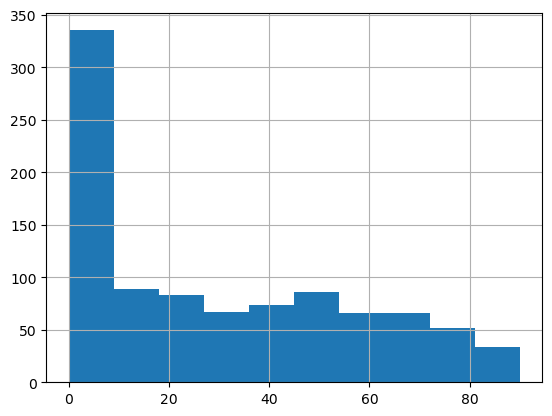

In [22]:
# There are still some players without team.
# They have influence in terms of points.
_miss_team =  df[df.team_x.isna()]
_miss_team.groupby('name')['minutes'].mean().hist()



In [23]:
# Are these players in the later seasons
_miss_list = _miss_team.name.to_list()
df[df.name.isin(_miss_list)].season_x.value_counts()

season_x
2019-20    22560
2018-19    21790
2020-21    18242
2021-22    15100
2017-18    11285
2022-23    10947
2016-17     8567
Name: count, dtype: int64

In [24]:
# All missing team values are now from two seasons only, the ones we concated
_miss_team.season_x.value_counts()

season_x
2019-20    22560
2018-19    21790
2017-18    11285
2016-17     8567
Name: count, dtype: int64

In [25]:
# For the sake of initial EDA we will drop these rows but we will come back to these later
df.dropna(subset='team_x', inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76317 entries, 19852 to 43705
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          76317 non-null  object 
 1   assists       76317 non-null  int64  
 2   goals_scored  76317 non-null  int64  
 3   total_points  76317 non-null  int64  
 4   minutes       76317 non-null  int64  
 5   clean_sheets  76317 non-null  int64  
 6   value         76317 non-null  int64  
 7   was_home      76317 non-null  bool   
 8   threat        76317 non-null  float64
 9   yellow_cards  76317 non-null  int64  
 10  GW            76317 non-null  int64  
 11  season_x      76317 non-null  object 
 12  team_x        76317 non-null  object 
 13  position      76317 non-null  object 
dtypes: bool(1), float64(1), int64(8), object(4)
memory usage: 8.2+ MB


In [27]:
df.columns

Index(['name', 'assists', 'goals_scored', 'total_points', 'minutes',
       'clean_sheets', 'value', 'was_home', 'threat', 'yellow_cards', 'GW',
       'season_x', 'team_x', 'position'],
      dtype='object')

/Users/katherinevoss-robinson/anaconda3/envs/w207_final/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/katherinevoss-robinson/anaconda3/envs/w207_final/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/katherinevoss-robinson/anaconda3/envs/w207_final/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


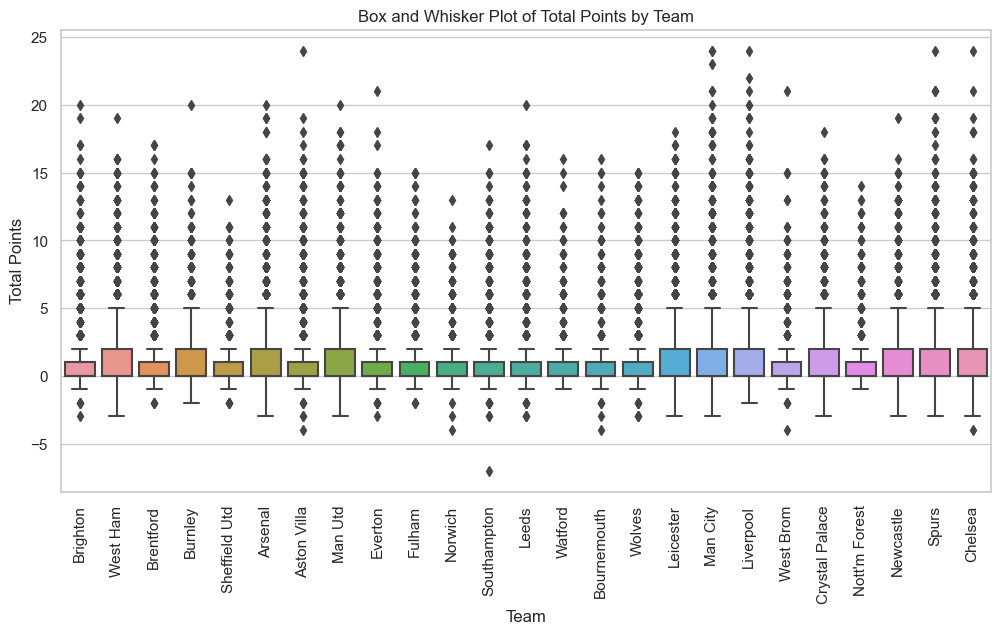

In [28]:



# Assuming your dataset is named 'df' and 'total_points' and 'team_x' are the relevant columns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the box and whisker plot
sns.boxplot(x='team_x', y='total_points', data=df)

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.title('Box and Whisker Plot of Total Points by Team')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


The better teams do marginally better, but interesting to see that instead of clear winners there are teams that are clear losers in terms of total points

Man City is the clear exception. Makes sense since they have won the league five times in the period under review

In [29]:

# Try to fill position missing values
# Sort the DataFrame by player and season in descending order
df.sort_values(by=['name', 'season_x'], ascending=[True, False], inplace=True)

# Fill missing 'position' values using the last non-null value within each player's career
# df['position'].fillna(method='ffill', inplace=True)
df['position'].ffill(inplace=True)

# Reset the index if needed
# df.reset_index(drop=True, inplace=True)

# Check for any remaining missing values
missing_positions = df[df['position'].isnull()]

# Print the players with missing positions (if any)
print(missing_positions[['name', 'season_x']])

Empty DataFrame
Columns: [name, season_x]
Index: []


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76317 entries, 44691 to 43705
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          76317 non-null  object 
 1   assists       76317 non-null  int64  
 2   goals_scored  76317 non-null  int64  
 3   total_points  76317 non-null  int64  
 4   minutes       76317 non-null  int64  
 5   clean_sheets  76317 non-null  int64  
 6   value         76317 non-null  int64  
 7   was_home      76317 non-null  bool   
 8   threat        76317 non-null  float64
 9   yellow_cards  76317 non-null  int64  
 10  GW            76317 non-null  int64  
 11  season_x      76317 non-null  object 
 12  team_x        76317 non-null  object 
 13  position      76317 non-null  object 
dtypes: bool(1), float64(1), int64(8), object(4)
memory usage: 8.2+ MB


/Users/katherinevoss-robinson/anaconda3/envs/w207_final/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/katherinevoss-robinson/anaconda3/envs/w207_final/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/katherinevoss-robinson/anaconda3/envs/w207_final/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


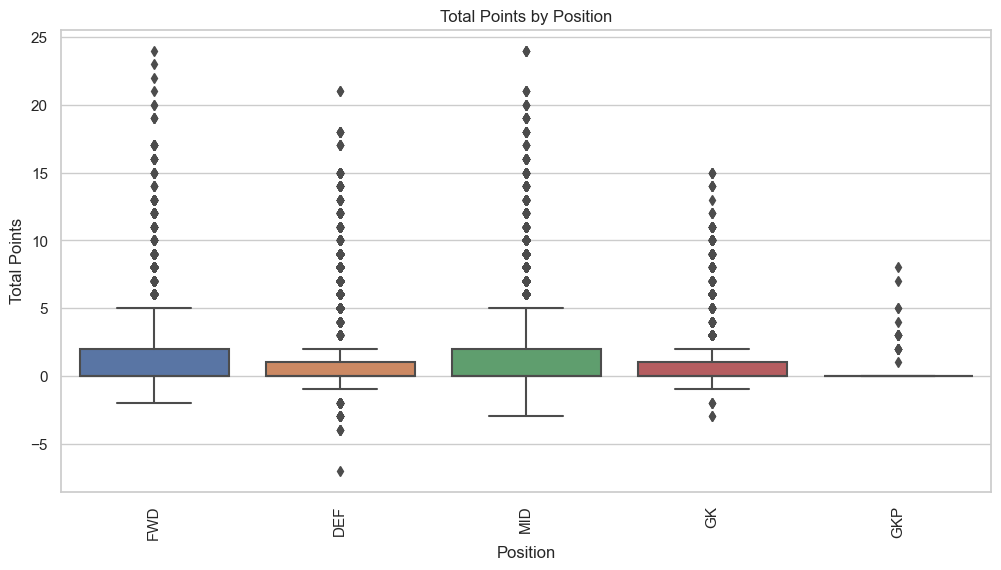

In [31]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the box and whisker plot
sns.boxplot(x='position', y='total_points', data=df)

# Add labels and title
plt.xlabel('Position')
plt.ylabel('Total Points')
plt.title('Total Points by Position')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Correlation

We wont have these values when we are trying to make a prediction, however we can fill those in using a 3week rolling average.
Also we plan to use categorical features team and position

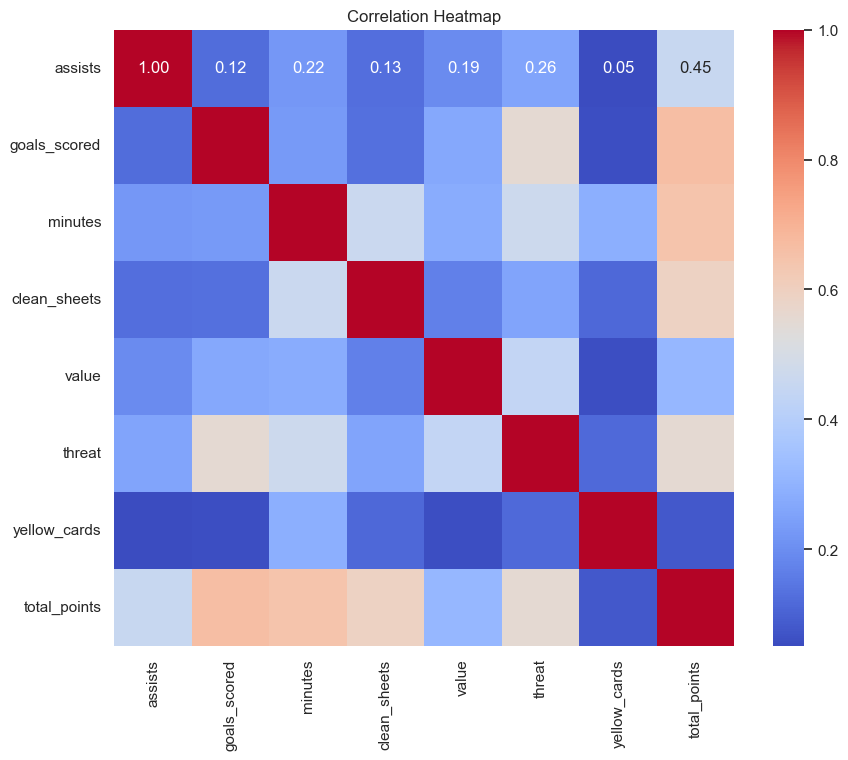

In [32]:
selected_columns = ['assists', 'goals_scored', 'minutes', 'clean_sheets', 'value', 'threat', 'yellow_cards' ]

# Calculate the correlation matrix
correlation_matrix = df[selected_columns + ['total_points']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [35]:
df.season_x.value_counts()

season_x
2022-23    26505
2021-22    25447
2020-21    24365
Name: count, dtype: int64

In [34]:
df.columns

Index(['name', 'assists', 'goals_scored', 'total_points', 'minutes',
       'clean_sheets', 'value', 'was_home', 'threat', 'yellow_cards', 'GW',
       'season_x', 'team_x', 'position'],
      dtype='object')

In [37]:
df.shape

(76317, 14)